# Biodiversity in National Parks

This project performs an analysis of data on the conservation status of endangered species in different national parks and investigates whether there are patterns or issues related to the types of species that are endangered.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:
    
    1) What is the distribution of conservation_status for animals?
    2) Are certain types of species more likely to be endangered?
    3) Are the differences between species and their conservation status significant?
    4) Which species were spotted the most at each park?

**Data sources:**
The National Institute of Standards and Technology’s (NIST) EDA Introduction.

## Project Scope
This project is divided in 4 parts: 
    - The first part is the project goals, where we will be defining the questions to be answered. 
    - The second part covers everything related to data: import data, to explore data, change columns names and data cleaning if needed. 
    - The third part is the analysis and methods applied to answer the questions using Statistical inference, descriptive statistics and data visualization techniques. 
    - And finally, the last part makes conclusions about the answers obtained.

## Project Goals
The National Park Service wants to **ensure the survival of at-risk species**, to maintain the level of biodiversity within their parks so we need to be focus on a **biodiversity analysis** for the National Parks Service. Also, we need to **understand the characteristics about the species**, their **conservations status**, and those species and their **relationship to the national parks.** These are some of the questions that arise:

    1) What is the distribution of conservation_status for animals?
    2) Are certain types of species more likely to be endangered?
    3) Are the differences between species and their conservation status significant?
    4) Which species were spotted the most at each park?

## Data

### Import Python Modules

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

### Loading CSV files

In [2]:
observations = pd.read_csv("observations.csv")
observations.head()

#observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species = pd.read_csv("species_info.csv")
species.head()
#species_info.csv - contains data about different species and their conservation status.

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Explore the data

About the dataframes:

In [4]:
print(f"observations shape: {observations.shape}")
print(f"species shape: {species.shape}")

observations shape: (23296, 3)
species shape: (5824, 4)


About the 'observations' dataframe:
- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [5]:
print(f"There are {observations.scientific_name.nunique()} different scientific names in the 'observations' dataframe.")
print(f"There are {observations.park_name.nunique()} national parks involved, those are: {observations.park_name.unique()}")
print(f"There are {observations.observations.sum()} total observations.")

There are 5541 different scientific names in the 'observations' dataframe.
There are 4 national parks involved, those are: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
There are 3314739 total observations.


About the 'species' dataframe: 
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status


In [6]:
print(f"There are {species.category.nunique()} different categories of species, those are: {species.category.unique()}")
print(f"There are {species.scientific_name.nunique()} different scientific names in the 'species' dataframe.")
print(f"There are {species.conservation_status.nunique()} different types of conserations status, those are: {species.conservation_status.unique()}")

There are 7 different categories of species, those are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
There are 5541 different scientific names in the 'species' dataframe.
There are 4 different types of conserations status, those are: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Notice there is a NaN value on the 'species' dataframe.

### Data Cleaning
Since there are NaN values, we must change that description to a more descriptive one.

In [7]:
species.conservation_status.fillna("Not yet classified", inplace=True)
#species

## Analysis and Methods

### 1) What is the distribution of conservation_status for animals?

In [8]:
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Not yet classified    5633
Species of Concern     161
Threatened              10
dtype: int64

This distribution give us an idea about the total number of each species, but we need to know also the type of animal so we can group by conservation status and category.

In [9]:
conservationCategory = species[species.conservation_status != "Not yet classified"]
conservationCategory = conservationCategory.groupby(["conservation_status", "category"])['scientific_name'].count().unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Now we can plot the distribution by category and conservation_status as follow:

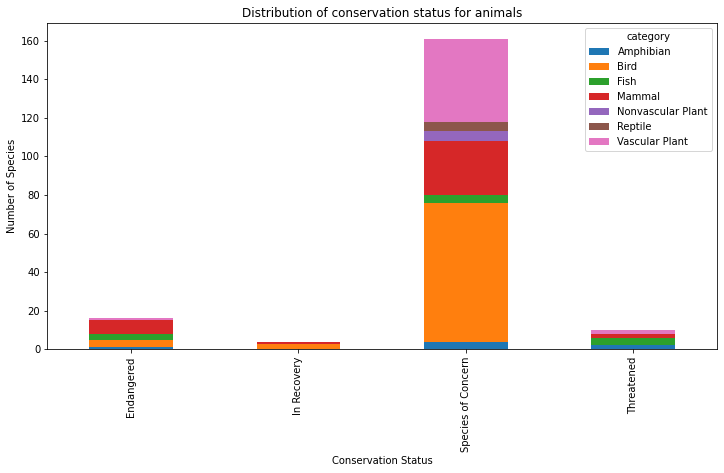

In [10]:
ax = conservationCategory.plot(kind = 'bar', figsize=(12,6), stacked=True)
ax.set_title('Distribution of conservation status for animals')
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
#plt.savefig('Dist_conservation_animals.png')
plt.show()

***We can see that mammals prevail on the endangered status and birds in the recovery status. We had a total nomber of 161 species of concern but now we know that the majority of those species are birds, vascular plants and mammals so keep that in mind.***

### 2) Are certain types of species more likely to be endangered?

This question needs to be answered by creating a new column called is_protected and include any species that had a value other than Not yet classified. 

In [11]:
species['is_protected'] = species.conservation_status != 'Not yet classified'
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not yet classified,False
1,Mammal,Bos bison,"American Bison, Bison",Not yet classified,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not yet classified,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not yet classified,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not yet classified,False


Then, we have to group by category and is_protected to show the break down of each species type and protection status.

In [12]:
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()
#PIvoting tables
category_counts = category_counts.pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
category_counts.columns = ['Category', 'Not_Protected', 'Protected']
#Also, we need to calculate the percentage of protected animals on each category as follow:
category_counts['Percent_Protected'] = round(category_counts.Protected / (category_counts.Protected+category_counts.Not_Protected) * 100,2)
category_counts

,Category,Not_Protected,Protected,Percent_Protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


***In the table above, we can see that all species have a protected percentage below 16%, so it is very low. The lowest percentage of protected species are Non-vascular plants and Vascular plants, so we can conclude that the species that are most likely to be in danger are those that have a high number as 'species of concern' and those with the lowest percentage_protected; Therefore, it is very likely that vascular plants are in danger.***

### 3) Are the differences between species and their conservation status significant?

If we want to understand whether the results of two categorical variables are associated, we must use a Chi square test.
In this case, we want to see if there appears to be any significant relationship between species. Since mammals have a high percentage_protected compared to other species, we are going to perform a Chi Square test between Mammals vs Reptiles, Non-Vascular Plant and Vascular Plant.
The standard threshold will be 0.05 to define if there is any statistical significance.

#### Mammal vs Resptile

In [13]:
from scipy.stats import chi2_contingency
X = [[30, 146],
    [5, 73]]
chi2, pval, dof, expected = chi2_contingency(X)
if pval < 0.05:
    print(f"There is a statistical significance, Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles.")
else:
    print("There is no statistical significance, there doesn't seem to be any significant relationship between mammals and reptiles")

There is a statistical significance, Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles.


#### Mammal vs Non-Vascular Plant

In [14]:
X = [[30, 146],
    [5, 328]]
chi2, pval, dof, expected = chi2_contingency(X)
if pval < 0.05:
    print(f"There is a statistical significance, Mammals are shown to have a statistically significant higher rate of needed protection compared with Non-Vascular Plant.")
else:
    print("There is no statistical significance, there doesn't seem to be any significant relationship between mammals and Non-Vascular Plant")

There is a statistical significance, Mammals are shown to have a statistically significant higher rate of needed protection compared with Non-Vascular Plant.


#### Mammal vs Vascular Plant

In [15]:
X = [[30, 146],
    [46, 4216]]
chi2, pval, dof, expected = chi2_contingency(X)
if pval < 0.05:
    print(f"There is a statistical significance, Mammals are shown to have a statistically significant higher rate of needed protection compared with Vascular Plant.")
else:
    print("There is no statistical significance, there doesn't seem to be any significant relationship between mammals and Vascular Plant")

There is a statistical significance, Mammals are shown to have a statistically significant higher rate of needed protection compared with Vascular Plant.


#### Extra: Fish vs Amphibian since they have a very close percentage protected value.

In [16]:
X = [[11, 115],
    [7, 72]]
chi2, pval, dof, expected = chi2_contingency(X)
if pval < 0.05:
    print(f"There is a statistical significance, Fish are shown to have a statistically significant higher rate of needed protection compared with Amphibian.")
else:
    print("There is no statistical significance, there doesn't seem to be any significant relationship between Fish and Amphibian")

There is no statistical significance, there doesn't seem to be any significant relationship between Fish and Amphibian


### 4) Which species were spotted the most at each park?

In this section, we are going to find the 5 most spotted species in each national park according to the number of observations.
Also, we will use the given common names instead of scientific names.

#### Top 5 most spotted species at Great Smoky Mountains National Park

In [17]:
def top_5_common_names_in_parks(national_park):
    
    filtering_park = observations[observations.park_name == national_park]
    most_spotted = filtering_park.nlargest(5, 'observations').reset_index()
    top_5_names = []
    for i in most_spotted.scientific_name:
        top_5_names.append(i)

    top_5_names_common = []
    for i in top_5_names:
        for x in species.scientific_name.unique():
            if i == x:
                y = species[species.scientific_name == i]
                w = str(y.common_names.values)
                w = w.strip("\[]")
                w = w.strip("/'")
                top_5_names_common.append(w)

    number_observations = []
    for i in most_spotted.observations:
        number_observations.append(i)

    top_5 = pd.DataFrame([
    [top_5_names_common[0], number_observations[0]],
    [top_5_names_common[1], number_observations[1]],
    [top_5_names_common[2], number_observations[2]],
    [top_5_names_common[3], number_observations[3]],
    [top_5_names_common[4], number_observations[4]]
    ],
    columns=['Common Name Species', '# of Observations'])
    return top_5
  
top_5_common_names_in_parks('Great Smoky Mountains National Park')

,Common Name Species,# of Observations
0,Spiny Sowthistle,147
1,Violet Bush-Clover,146
2,"Cutleaf Grape-Fern, Cut-Leaved Grape Fern",144
3,"Bearded Fescue, Nodding Fescue",141
4,Cackling Goose,139


#### Top 5 most spotted species at Yosemite National Park

In [18]:
top_5_common_names_in_parks('Yosemite National Park')

,Common Name Species,# of Observations
0,"""Shockley's Ivesia, Sky Mousetail""",223
1,"Dwarf Bulrush, Smallflower Halfchaff Sedge, Sm...",222
2,Southern Nodding Trillium,219
3,"Gray Low Sagebrush, Little Sagebrush",219
4,"Pale Indian Paintbrush, Pale Paintbrush",214


#### Top 5 most spotted species at Bryce National Park

In [19]:
top_5_common_names_in_parks('Bryce National Park')

,Common Name Species,# of Observations
0,"Beaked Corn-Salad, Corn Salad",176
1,Sourclover,173
2,"""Bloomer's Goldenbush, Rabbitbush""",172
3,"Fewseed Draba, Glacier Draba",167
4,"Pine Marten' 'American Marten, Marten",167


#### Top 5 most spotted species at Yellowstone National Park

In [20]:
top_5_common_names_in_parks('Yellowstone National Park')

,Common Name Species,# of Observations
0,"Deep-Root Clubmoss, Ground Cedar",321
1,"Giant Red Indian Paintbrush, Great Red Indian ...",317
2,American Dragonhead,316
3,"""Fendler's Cryptantha, Sanddune Catseye, Sandd...",316
4,"Stick-Tight, Three-Lobe Beggar-Ticks'\n 'Three...",314


## Conclusions
In this project we were able to answer the questions first posed on the project goals section.

- What is the distribution of conservation status for animals?
    - Mammals prevail on the endangered status and birds in the recovery status. We had a total nomber of 161 species of concern and the majority of those species are birds, vascular plants and mammals.
    
- Are certain types of species more likely to be endangered?
    - Initially, all species have a protected percentage below 16%, so it is very low. The lowest percentage of protected species are Non-vascular plants and Vascular plants, so we can conclude that the species that are most likely to be in danger are those that have a high number as 'species of concern' and those with the lowest percentage_protected; Therefore, it is very likely that vascular plants are in danger.
    
- Are the differences between species and their conservation status significant?
    - There is a higher rate of needed protection statistical significance between Mammals vs Reptiles, Mammals vs Non-Vascular Plant and Mammals vs Vascular Plant.
    
- Which species were spotted the most at each park?
    - The study found that: Spiny Sowthistle is the most spotted species observed at Great Smoky Mountains National Park with 147 observations.
    - Shockley's Ivesia/Sky Mousetail is the most spotted species observed at Yosemite National Park with 223 observations.
    - Beaked Corn-Salad/Corn Salad is the most spotted species observed at Bryce National Park with 176 observations.
    - Deep-Root Clubmoss/Ground Cedar is the most spotted species observed at Yellowstone National Park with 321 observations.
    



In [2]:
!jt -t onedork